In [556]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [516]:
data=pd.read_csv('C:\\Users\\shiko\\AppData\\Local\\Temp\Rar$DIa7432.19021\\nearest-earth-objects(1910-2024).csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\shiko\AppData\Local\Temp\ipykernel_9384\3515101664.py:1: SyntaxWarning: invalid escape sequence '\R'
  data=pd.read_csv('C:\\Users\\shiko\\AppData\\Local\\Temp\Rar$DIa7432.19021\\nearest-earth-objects(1910-2024).csv')


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [518]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [519]:
data.duplicated().sum()

0

In [520]:
data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [521]:
data.dropna(inplace=True)


In [522]:
data.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [523]:
data.dtypes
#name is object but we didn't want to encode it beuause we have a neo_id

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [524]:
data.shape

(338171, 9)

In [525]:
data['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [526]:
#it has a unique value so drop it
data.drop(columns='orbiting_body',inplace=True)

In [527]:
data.drop(columns='name',inplace=True)

In [528]:
#data.drop(columns='neo_id',inplace=True)

In [529]:
data.corr()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
neo_id,1.000000,0.350145,-0.198471,-0.198471,-0.103069,-0.090746,-0.156769
absolute_magnitude,0.350145,1.000000,-0.594646,-0.594646,-0.345570,-0.213523,-0.343996
estimated_diameter_min,-0.198471,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
estimated_diameter_max,-0.198471,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
relative_velocity,-0.103069,-0.345570,0.222434,0.222434,1.000000,0.322589,0.187034
miss_distance,-0.090746,-0.213523,0.111475,0.111475,0.322589,1.000000,-0.006542
is_hazardous,-0.156769,-0.343996,0.164841,0.164841,0.187034,-0.006542,1.000000


filtering

In [531]:
#so if we drop column estimated_diameter_min or estimated_diameter_max its no difference
data.drop(columns='estimated_diameter_max',inplace=True)

In [532]:
for col in data.columns:
    if col=="is_hazardous" or col=="estimated_diameter_min":
        continue
    else:
    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit= Q1 - 1.5*IQR
        upper_limit= Q3 + 1.5*IQR
        condition =data[(data[col]<lower_limit)|(data[col]>upper_limit)].index
        print(f"{col} has {data[(data[col]<lower_limit)|(data[col]>upper_limit)].shape[0]} rows are outlier")
        data.drop(condition,inplace=True)
        
else:
    print("no outliers")
   

neo_id has 0 rows are outlier
absolute_magnitude has 389 rows are outlier
relative_velocity has 5441 rows are outlier
miss_distance has 0 rows are outlier
no outliers


the previous code give me that estimated_diameter_min"max" 26166 row is outlier and it's illogical so we will ignore that  

In [534]:
print(data.shape) 


(332341, 6)


**visualization**

Text(0.5, 1.0, 'distribution')

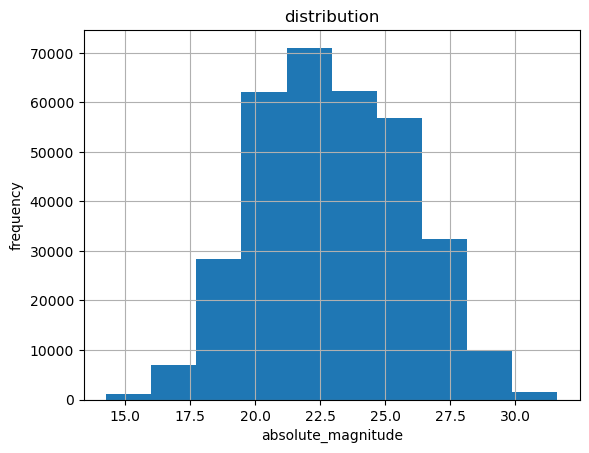

In [537]:
data['absolute_magnitude'].hist()
plt.xlabel('absolute_magnitude')
plt.ylabel('frequency')
plt.title('distribution')

Text(0.5, 1.0, 'distribution of min diameters')

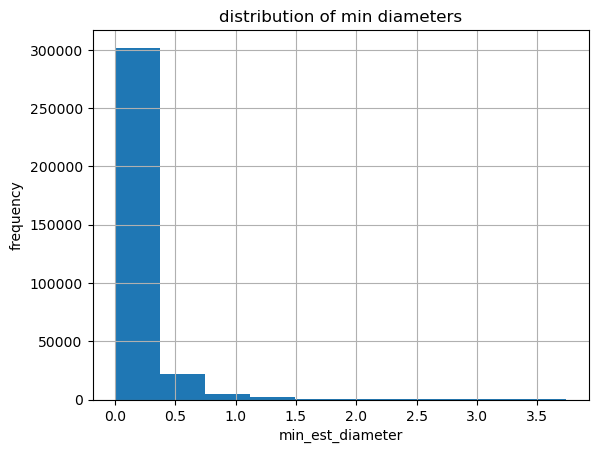

In [538]:
data['estimated_diameter_min'].hist()
#plt.xlim(0,10)
plt.xlabel('min_est_diameter')
plt.ylabel('frequency')
plt.title('distribution of min diameters')

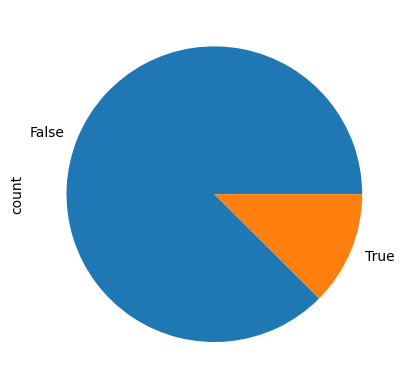

In [539]:
data['is_hazardous'].value_counts().plot(kind='pie');

****knn****

In [545]:
X = data.drop("is_hazardous", axis=1).values
y = data["is_hazardous"].values

# Split into training and test sets
# Stratification is important for classification problems

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(f"accuracy is : {knn.score(X_test, y_test)}")

accuracy is : 0.8666295566354241


****underfitting and over fitting***

In [547]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

maximum_accuracy = 0
best_k = 0

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

    if test_accuracies[neighbor] > maximum_accuracy:
        maximum_accuracy = test_accuracies[neighbor]
        best_k = neighbor

print(f"Best k = {best_k}")

Best k = 12


******visualization of model complexity******

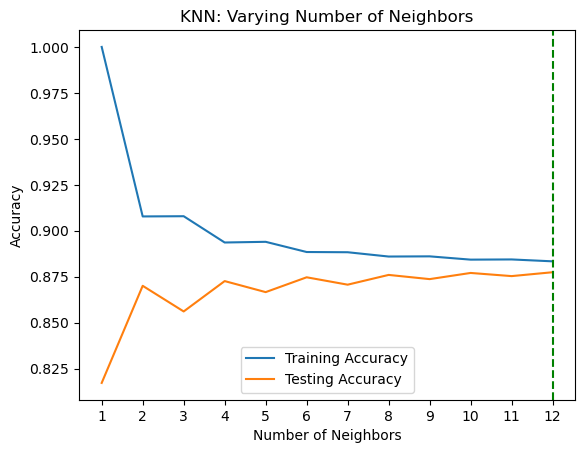

In [550]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.axvline(x=best_k, color="green", linestyle="--")
plt.xticks(neighbors)

# Display the plot
plt.show()


******performance******

In [552]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57331   851]
 [ 7478   809]]
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     58182
        True       0.49      0.10      0.16      8287

    accuracy                           0.87     66469
   macro avg       0.69      0.54      0.55     66469
weighted avg       0.84      0.87      0.84     66469



*******logistic*******

In [559]:
X = data.drop("is_hazardous", axis=1).values
y = data["is_hazardous"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [563]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [565]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[0.34226043 0.05231442 0.01648601 ... 0.1906342  0.14469604 0.18897349]


In [567]:
y_pred = logreg.predict(X_test)
print(y_pred)

combined = np.column_stack((y_pred_prob, y_pred))
print(combined)

[False False False ... False False False]
[[0.34226043 0.        ]
 [0.05231442 0.        ]
 [0.01648601 0.        ]
 ...
 [0.1906342  0.        ]
 [0.14469604 0.        ]
 [0.18897349 0.        ]]


In [569]:
print("Accuracy on training set:", logreg.score(X_test, y_test))

Accuracy on training set: 0.8741669048729483


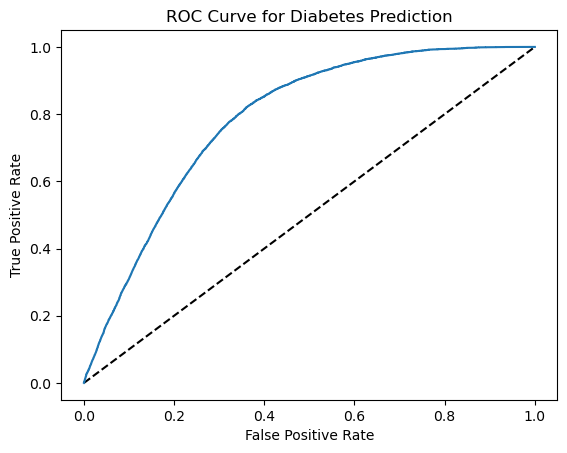

In [571]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [573]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7851078544054785
[[57989   172]
 [ 8192   116]]
              precision    recall  f1-score   support

       False       0.88      1.00      0.93     58161
        True       0.40      0.01      0.03      8308

    accuracy                           0.87     66469
   macro avg       0.64      0.51      0.48     66469
weighted avg       0.82      0.87      0.82     66469

